In [67]:
# Collect Training Data

# Label the data & store in HDF5 format

# Train the model using CNN

In [93]:
# # Train the model using CNN (?)
# import tables
# import numpy as np
# from random import shuffle
# from math import ceil
# import matplotlib.pyplot as plt

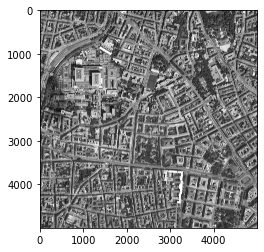

In [94]:
# Collect Training Data
import cv2
import matplotlib.pyplot as plt

img_path = "/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/images/vienna9.tif"
bgr_img = cv2.imread(img_path)
grey_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize & rescale images to lie [0, 1]
# 0 is black, 1 (255) is white
grey_img = grey_img.astype("float32")/255

plt.imshow(grey_img, cmap='gray')
plt.show()

In [95]:
import numpy as np

filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


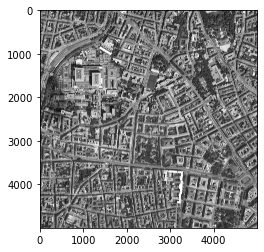

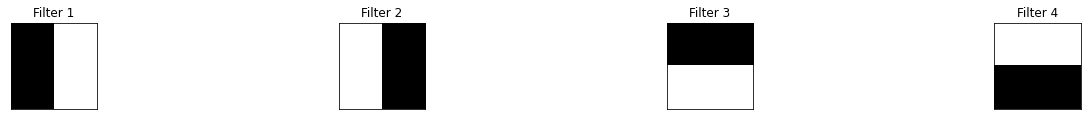

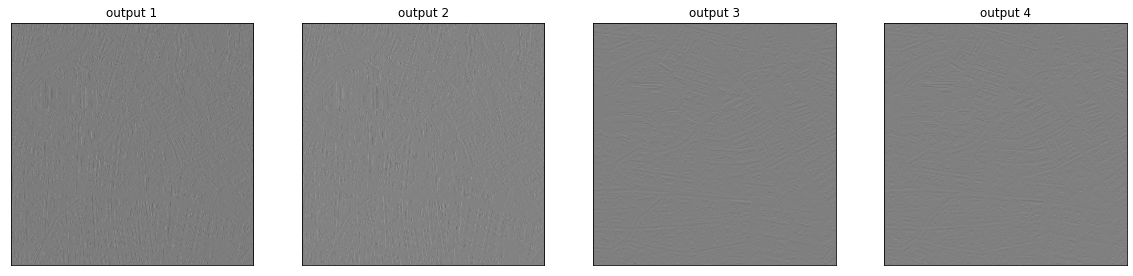

In [87]:
## DEFINING THE CONVOLUTIONAL LAYERS ## 

import torch
import torch.nn as nn
import torch.nn.functional as F

# NN with one convolutional layer with four filters
class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        # initalizes the weights of the C layer to be 
        # weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
    def forward(self, x):
        # calculates then output of a C layer pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        # returns both layers
        return conv_x, activated_x

# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
    
# print out the layer in the network)
print(model)

def viz_layer(layer, n_filters=4):
    fig = plt.figure(figsize=(20, 20))
    for i in range(n_filters):
            ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
            # grab layer outputs
            ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
            ax.set_title('output %s' % str(i+1))

# plot the original image
plt.imshow(grey_img, cmap='gray')

# visualize all of the filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    
# Convert the image into an input tensor
grey_img_tensor = torch.from_numpy(grey_img).unsqueeze(0).unsqueeze(1)

# Get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(grey_img_tensor)

# Visualize the output of a convolutional layer
viz_layer(conv_layer)

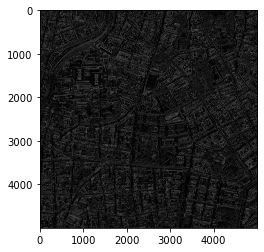

In [96]:
# 3x3 array for edge detection
grey_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_x = np.array([[-1,  0,  1], [0, 0, 0], [1, 2, 1]])
filtered_image = cv2.filter2D(grey_img, -1, sobel_y)
plt.imshow(filtered_image, cmap='gray')

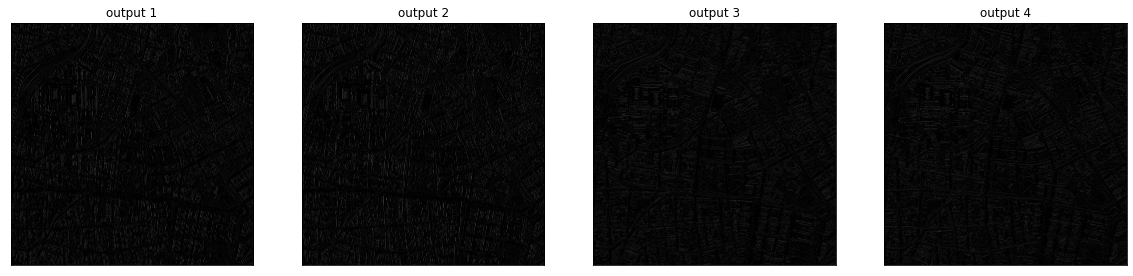

In [92]:
viz_layer(activated_layer)